# Integrantes do grupo
**Daniel Kenichi Tiago Tateishi** RA:790837

**Jo√£o Dini de Miranda** RA: 790716

## Etapa 1 a 5
Selecionamos o conjunto de dados [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

O conjunto est√° dispon√≠vel em `sklearn.datasets`. 

Fazemos a convers√£o do conjunto de dados para um DataFrame do Pandas para melhor visualiza√ß√£o e tratamento dos dados.

Os atributos nominais do conjunto "Maligno" e "Benigno" j√° est√£o no formato bin√°rio e portanto n√£o necessitam de convers√£o.

In [ ]:
# Importando bibliotecas utilizadas
import numpy as np
import pandas as pd
import statistics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

# Ignorando warnings 
import warnings
warnings.filterwarnings('ignore')

# Carregando o banco de dados utilizado
breast_cancer = load_breast_cancer()
#X = breast_cancer.data
#Y = breast_cancer.target

# Convertendo o dataset para DataFrame do Pandas
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
#Y = data['class']   
#X = data.drop('class', axis=1)  

data = data.sample(frac=1).reset_index(drop=True)
data #Exibindo dados

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         10.260         12.22           65.75      321.6          0.09996   
1         11.620         18.18           76.38      408.8          0.11750   
2         16.250         19.51          109.80      815.8          0.10260   
3         19.530         18.90          129.50     1217.0          0.11500   
4         16.780         18.80          109.30      886.3          0.08865   
..           ...           ...             ...        ...              ...   
564       12.750         16.70           82.51      493.8          0.11250   
565       16.030         15.51          105.80      793.2          0.09491   
566       20.090         23.86          134.70     1247.0          0.10800   
567        7.691         25.44           48.34      170.4          0.08668   
568       14.970         19.76           95.50      690.2          0.08421   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.07542         0.01923              0.01968         0.1800   
1             0.14830         0.10200              0.05564         0.1957   
2             0.18930         0.22360              0.09194         0.2151   
3             0.16420         0.21970              0.10620         0.1792   
4             0.09182         0.08422              0.06576         0.1893   
..                ...             ...                  ...            ...   
564           0.11170         0.03880              0.02995         0.2120   
565           0.13710         0.12040              0.07041         0.1782   
566           0.18380         0.22830              0.12800         0.2249   
567           0.11990         0.09252              0.01364         0.2037   
568           0.05352         0.01947              0.01939         0.1515   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.06569  ...          15.65            73.23       394.5   
1                   0.07255  ...          25.40            88.14       528.1   
2                   0.06578  ...          23.05           122.10       939.7   
3                   0.06552  ...          26.24           171.10      2053.0   
4                   0.05534  ...          26.30           130.70      1260.0   
..                      ...  ...            ...              ...         ...   
564                 0.06623  ...          21.74            93.63       624.1   
565                 0.05976  ...          21.98           124.30      1070.0   
566                 0.07469  ...          29.43           158.80      1696.0   
567                 0.07751  ...          31.89            54.49       223.6   
568                 0.05266  ...          25.82           102.30       782.1   

     worst smoothness  worst compactness  worst concavity  \
0              0.1343            0.16500          0.08615   
1              0.1780            0.28780          0.31860   
2              0.1377            0.44620          0.58970   
3              0.1495            0.41160          0.61210   
4              0.1168            0.21190          0.23180   
..                ...                ...              ...   
564            0.1475            0.19790          0.14230   
565            0.1435            0.44780          0.49560   
566            0.1347            0.33910          0.49320   
567            0.1596            0.30640          0.33930   
568            0.1045            0.09995          0.07750   

     worst concave points  worst symmetry  worst fractal dimension  class  
0                 0.06696          0.2937                  0.07722      1  
1                 0.14160          0.2660                  0.09270      1  
2                 0.17750          0.3318                  0.09136      0  
3                 0.19800          0.2968                  0.09929      0  
4                 0.14740          0.2810                  0.07228   

## Etapa 6

Ap√≥s isso, dividimos o dataframe em 10 "folds" para poder dividir os dados em dados de treinamento e dados de teste.

---

Para realizar a divis√£o, verificamos o tamanho m√≠nimo de cada fold em `mfold_size`, e quantas amostras sobrariam caso dividissemos os folds com exatamente o mesmo tamanho e armazenamos esse valor em `r`. Dessa forma, conseguimos gerar os folds com a distribui√ß√£o das sobras previamente calculada (para os folds com posi√ß√£o menor que `k - r`, recebem o tamanho m√≠nimo, para folds com index maior que `k - r`, √© feito a distribui√ß√£o das amostras que sobraram).

Por exemplo, se fossemos dividir 14 amostras em 10 folds, teriamos um conjunto de folds em que o tamanho de cada fold seria representado pelo conjunto [1, 1, 1, 1, 1, 1, 2, 2, 2, 2].

In [ ]:
# N√∫mero de folds
k = 10 
# Restante a ser redistribuido nos folds
r = len(data.index)%k
# Tamanho m√≠nimo de um fold
mfold_size = (len(data.index) // k)
pos = 0
folds = []
for i in range(k):
  if i < k - r:
    folds.append(data.iloc[pos : pos + mfold_size, :])
    pos += mfold_size
  else:
    folds.append(data.iloc[pos : pos + mfold_size + 1, :])
    pos += mfold_size + 1
      
#print(folds) # Imprimir folds gerados

## Etapa 7 e 8
Agora com os folds gerados, vamos avaliar um algoritmo de indu√ß√£o de √°rvores de decis√£o usando a estrat√©gia 10-fold cross-validation.

Usamos a fun√ß√£o `fit()` para obter o "estimador" gerado pelo o algoritmo.



In [ ]:
# Resultado de cada itera√ß√£o
clfs = []    

# Conjunto X (Treino/Teste)
X_train = [] 
X_test = []

# Conjunto Y (Treino/Teste)
Y_train = [] 
Y_test = []

# Cada itera√ß√£o avalia o algoritmo em uma varia√ß√£o de Treino/Teste usando os folds
for i in range(k):
  # Obtendo e armazenando os conjuntos de treino/teste dessa itera√ß√£o
  test = folds[i]
  train = pd.DataFrame(None)
  for j in range(k):
    if j != i:
      train = pd.concat([train, folds[j]], ignore_index = True, axis = 0)

  Y_test.append(test['class'])
  Y_train.append(train['class'])
  X_train.append(train.drop('class', axis = 1))
  X_test.append(test.drop('class', axis = 1))

  # Treinando o algoritmo
  clf = tree.DecisionTreeClassifier(criterion='entropy')
  # Adicionando o resultado √† lista de resultados
  clfs.append(clf.fit(X_train[i], Y_train[i]))




## Etapa 9
Gerando a figura da √°rvore de decis√£o de uma das itera√ß√µes do cross-fold

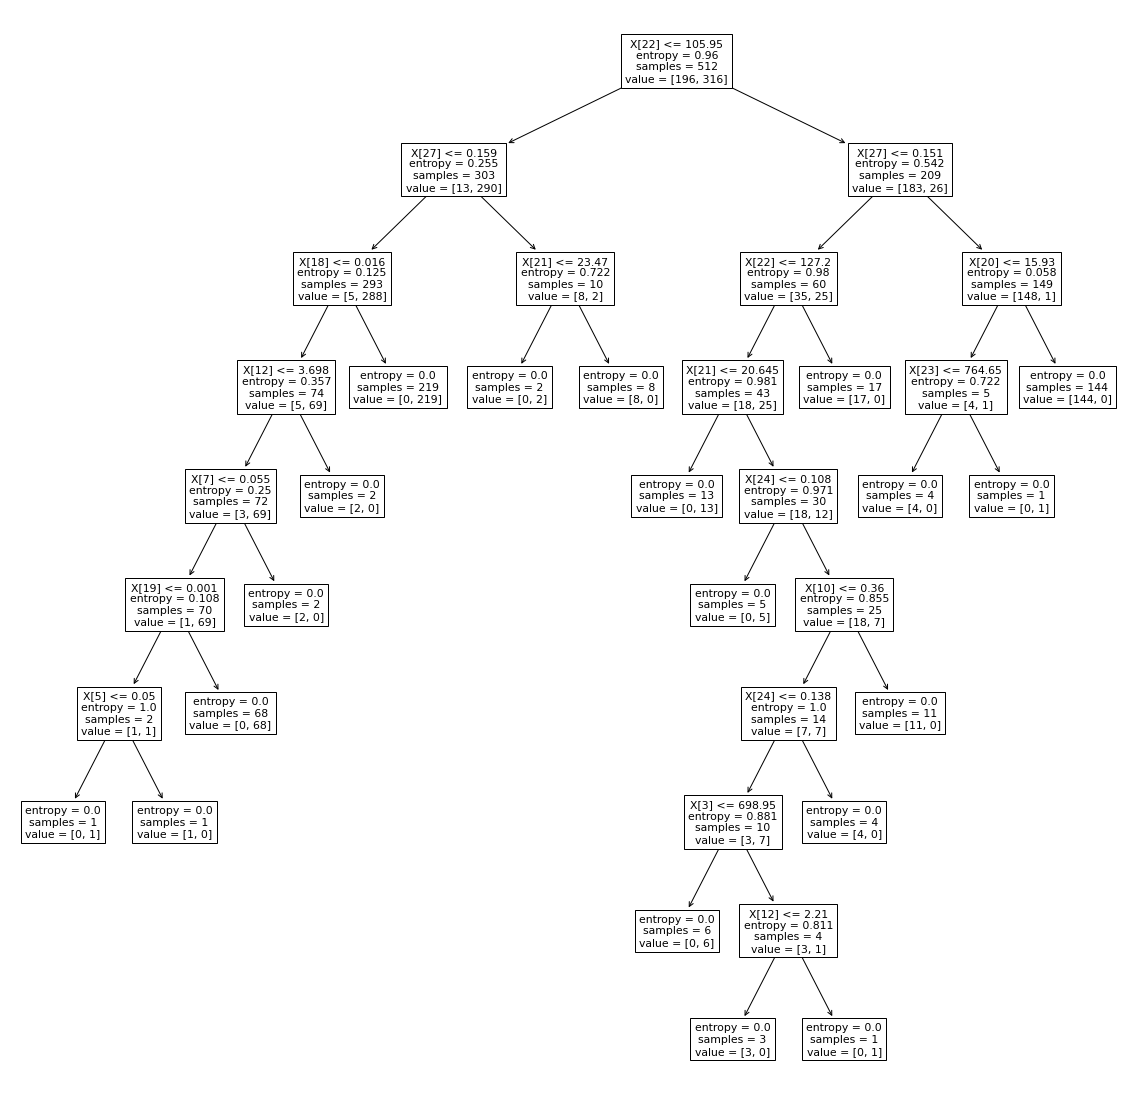

In [ ]:
fig = plt.figure(figsize=(20,20))
fig = tree.plot_tree(clfs[0])

## Etapa 10 e 11

Para cada itera√ß√£o do algoritmo, fazemos a classifica√ß√£o dos seus dados de teste usando `.predict()`

Ao mesmo tempo, calculamos para essa itera√ß√£o a matriz de confus√£o (`confusion_matrix()`) e o relat√≥rio da classifica√ß√£o (`classification_report()`) que podem ser vistos impressos a seguir.

Matrizes de confus√£o e relat√≥rios individuais


ü°Üü°Ü 0 ü°Ñü°Ñ



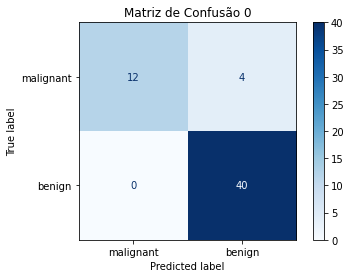


Relat√≥rio da classifica√ß√£o 0: 

              precision    recall  f1-score  support
0              1.000000  0.750000  0.857143     16.0
1              0.909091  1.000000  0.952381     40.0
accuracy       0.928571  0.928571  0.928571     56.0
macro avg      0.954545  0.875000  0.904762     56.0
weighted avg   0.935065  0.928571  0.925170     56.0


ü°Üü°Ü 1 ü°Ñü°Ñ



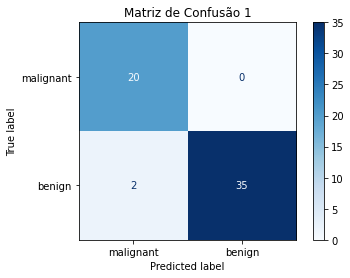


Relat√≥rio da classifica√ß√£o 1: 

              precision    recall  f1-score  support
0              0.909091  1.000000  0.952381     20.0
1              1.000000  0.945946  0.972222     37.0
accuracy       0.964912  0.964912  0.964912     57.0
macro avg      0.954545  0.972973  0.962302     57.0
weighted avg   0.968102  0.964912  0.965260     57.0


ü°Üü°Ü 2 ü°Ñü°Ñ



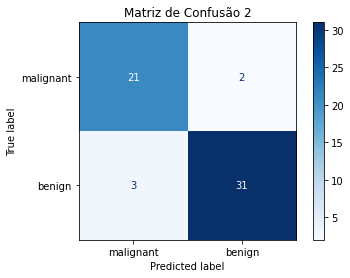


Relat√≥rio da classifica√ß√£o 2: 

              precision    recall  f1-score  support
0              0.875000  0.913043  0.893617     23.0
1              0.939394  0.911765  0.925373     34.0
accuracy       0.912281  0.912281  0.912281     57.0
macro avg      0.907197  0.912404  0.909495     57.0
weighted avg   0.913410  0.912281  0.912559     57.0


ü°Üü°Ü 3 ü°Ñü°Ñ



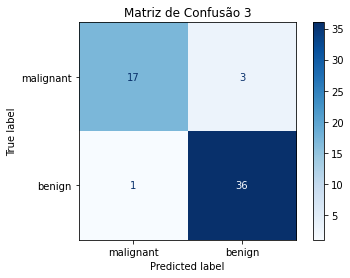


Relat√≥rio da classifica√ß√£o 3: 

              precision    recall  f1-score  support
0              0.944444  0.850000  0.894737     20.0
1              0.923077  0.972973  0.947368     37.0
accuracy       0.929825  0.929825  0.929825     57.0
macro avg      0.933761  0.911486  0.921053     57.0
weighted avg   0.930574  0.929825  0.928901     57.0


ü°Üü°Ü 4 ü°Ñü°Ñ



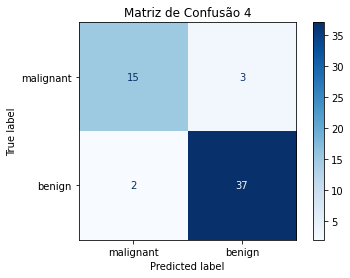


Relat√≥rio da classifica√ß√£o 4: 

              precision    recall  f1-score  support
0              0.882353  0.833333  0.857143     18.0
1              0.925000  0.948718  0.936709     39.0
accuracy       0.912281  0.912281  0.912281     57.0
macro avg      0.903676  0.891026  0.896926     57.0
weighted avg   0.911533  0.912281  0.911583     57.0


ü°Üü°Ü 5 ü°Ñü°Ñ



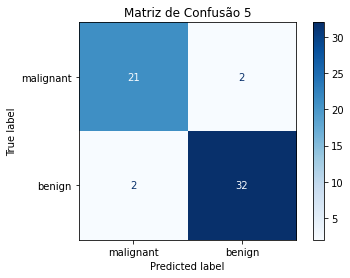


Relat√≥rio da classifica√ß√£o 5: 

              precision    recall  f1-score  support
0              0.913043  0.913043  0.913043     23.0
1              0.941176  0.941176  0.941176     34.0
accuracy       0.929825  0.929825  0.929825     57.0
macro avg      0.927110  0.927110  0.927110     57.0
weighted avg   0.929825  0.929825  0.929825     57.0


ü°Üü°Ü 6 ü°Ñü°Ñ



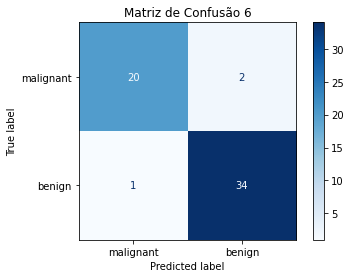


Relat√≥rio da classifica√ß√£o 6: 

              precision    recall  f1-score  support
0              0.952381  0.909091  0.930233     22.0
1              0.944444  0.971429  0.957746     35.0
accuracy       0.947368  0.947368  0.947368     57.0
macro avg      0.948413  0.940260  0.943990     57.0
weighted avg   0.947508  0.947368  0.947127     57.0


ü°Üü°Ü 7 ü°Ñü°Ñ



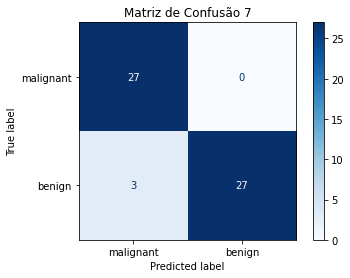


Relat√≥rio da classifica√ß√£o 7: 

              precision    recall  f1-score  support
0              0.900000  1.000000  0.947368     27.0
1              1.000000  0.900000  0.947368     30.0
accuracy       0.947368  0.947368  0.947368     57.0
macro avg      0.950000  0.950000  0.947368     57.0
weighted avg   0.952632  0.947368  0.947368     57.0


ü°Üü°Ü 8 ü°Ñü°Ñ



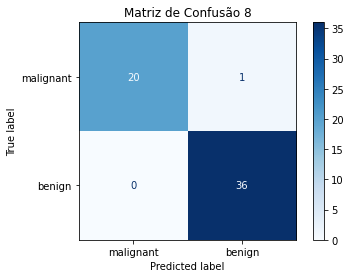


Relat√≥rio da classifica√ß√£o 8: 

              precision    recall  f1-score  support
0              1.000000  0.952381  0.975610     21.0
1              0.972973  1.000000  0.986301     36.0
accuracy       0.982456  0.982456  0.982456     57.0
macro avg      0.986486  0.976190  0.980956     57.0
weighted avg   0.982930  0.982456  0.982362     57.0


ü°Üü°Ü 9 ü°Ñü°Ñ



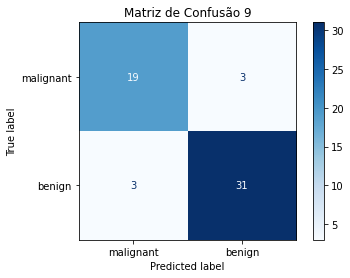


Relat√≥rio da classifica√ß√£o 9: 

              precision    recall  f1-score  support
0              0.863636  0.863636  0.863636     22.0
1              0.911765  0.911765  0.911765     34.0
accuracy       0.892857  0.892857  0.892857     56.0
macro avg      0.887701  0.887701  0.887701     56.0
weighted avg   0.892857  0.892857  0.892857     56.0


In [ ]:
print("Matrizes de confus√£o e relat√≥rios individuais")
class_reports = [] # Lista dos relat√≥rios de classifica√ß√£o

for i in range(k):  
  print(f"\n\nü°Üü°Ü {i} ü°Ñü°Ñ\n")

  # Classifica√ß√£o dos algoritmos com o conjunto de testes
  predicted = clfs[i].predict(X_test[i])

  # Gerando matriz de confus√£o
  class_names = breast_cancer.target_names
  title = f"Matriz de Confus√£o {i}"
  disp = plot_confusion_matrix(clfs[i], X_test[i], Y_test[i], display_labels=class_names, cmap=plt.cm.Blues)
  disp.ax_.set_title(title)
  plt.show()
  
  # Gerando relat√≥rios da classifica√ß√£o
  cr = classification_report(Y_test[i], predicted, output_dict=True)
  class_reports.append(pd.DataFrame(cr).transpose()) # Convertendo para DataFrames
  class_reports[i].iloc[2,3] = class_reports[i].iloc[3,3] 
  print(f"\nRelat√≥rio da classifica√ß√£o {i}: \n") 
  print(class_reports[i])
 

## Etapa 12
Calculando a m√©dia e o desvio padr√£o dentre as diferentes itera√ß√µes do algoritmo.

Para cada campo do relat√≥rio da classifica√ß√£o calculamos a m√©dia e o desvio padr√£o.

In [ ]:
# Usando dataframe como base para os novos
media_df = class_reports[0].copy()
desvio_df = class_reports[0].copy()

# Seleciona o campo do relat√≥rio
for i in range(len(class_reports[0])):
  for j in range(len(class_reports[0].columns)):
    # Percorre os relat√≥rios, na mesma posi√ß√£o e adiciona em uma lista
    valores_ij = []
    for cr in class_reports:
      valores_ij.append(cr.iloc[i][j])
    # Calcula M√©dia e Desvio Padr√£o
    media_df.iloc[i][j] = statistics.mean(valores_ij)
    desvio_df.iloc[i][j] = statistics.pstdev(valores_ij)

# Exibindo M√©dia e Desvio Padr√£o
print("M√©dia")
print(media_df)
print()
print("Desvio Padr√£o")
print(desvio_df)

M√©dia
              precision    recall  f1-score  support
0              0.923995  0.898453  0.908491     21.2
1              0.946692  0.950377  0.947841     35.6
accuracy       0.934774  0.934774  0.934774     56.8
macro avg      0.935343  0.924415  0.928166     56.8
weighted avg   0.936444  0.934774  0.934301     56.8

Desvio Padr√£o
              precision    recall  f1-score   support
0              0.046339  0.073423  0.040164  2.856571
1              0.031820  0.033920  0.020414  2.727636
accuracy       0.025210  0.025210  0.025210  0.400000
macro avg      0.028060  0.033418  0.028518  0.400000
weighted avg   0.025843  0.025210  0.025382  0.400000
